In [1]:
from mplsoccer.pitch import Pitch
from mplsoccer.statsbomb import read_event, EVENT_SLUG
import os
import pandas as pd
import numpy as np

In [2]:
match_files = ['19789.json', '19794.json', '19805.json']
kwargs = {'related_event_df': False,'shot_freeze_frame_df': False, 'tactics_lineup_df': False}
df = pd.concat([read_event(os.path.join(EVENT_SLUG,file), **kwargs)['event'] for file in match_files])

In [3]:
mask_chelsea_pressure = (df.team_name == 'Chelsea FCW') & (df.type_name == 'Pressure')
df = df.loc[mask_chelsea_pressure,['x','y']]

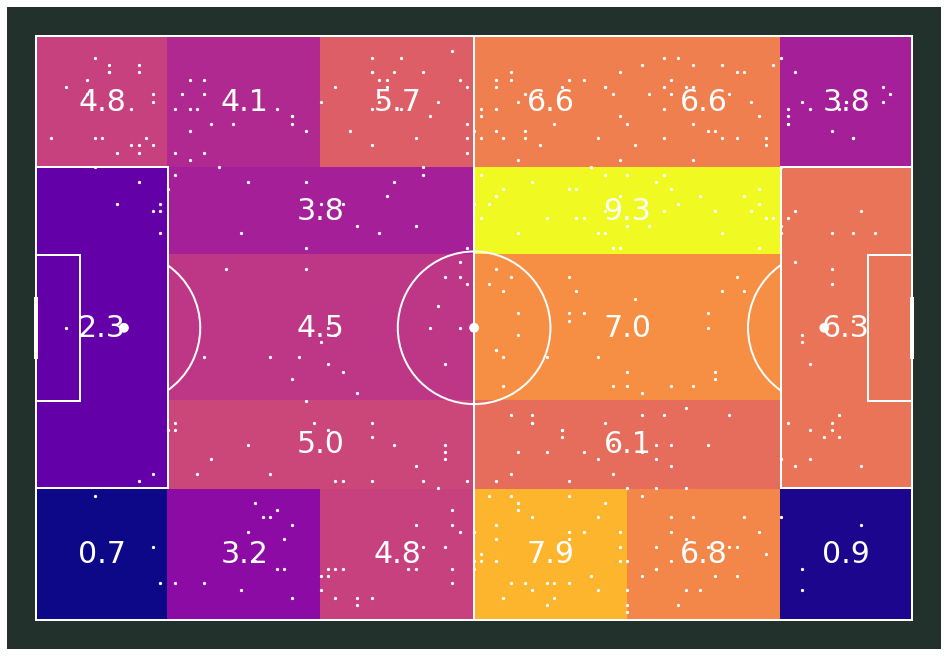

In [4]:
pitch = Pitch(pitch_type = 'statsbomb', figsize = (16, 9), line_zorder=2, pitch_color= '#22312b')
(statistic_grid, statistic,
 x_grid, y_grid, cx, cy) = pitch.binned_statistic_positional(df.x, df.y,
                                                             statistic='count',
                                                             positional='full')
# work out proportions
all_pressure_count = statistic.sum()
statistic_grid = [(array/all_pressure_count*100).round(1) for array in statistic_grid]
statistic = (statistic/all_pressure_count * 100).round(1)
# draw
fig, ax = pitch.draw()
pitch.heatmap_positional(x_grid, y_grid, statistic_grid, statistic, ax=ax, zorder=2, cmap='plasma')
pitch.label_heatmap(statistic, cx, cy, color='white', fontsize=30, ax=ax, ha = 'center', va = 'center')
pitch.scatter(df.x, df.y, c='white', s=5, ax=ax)

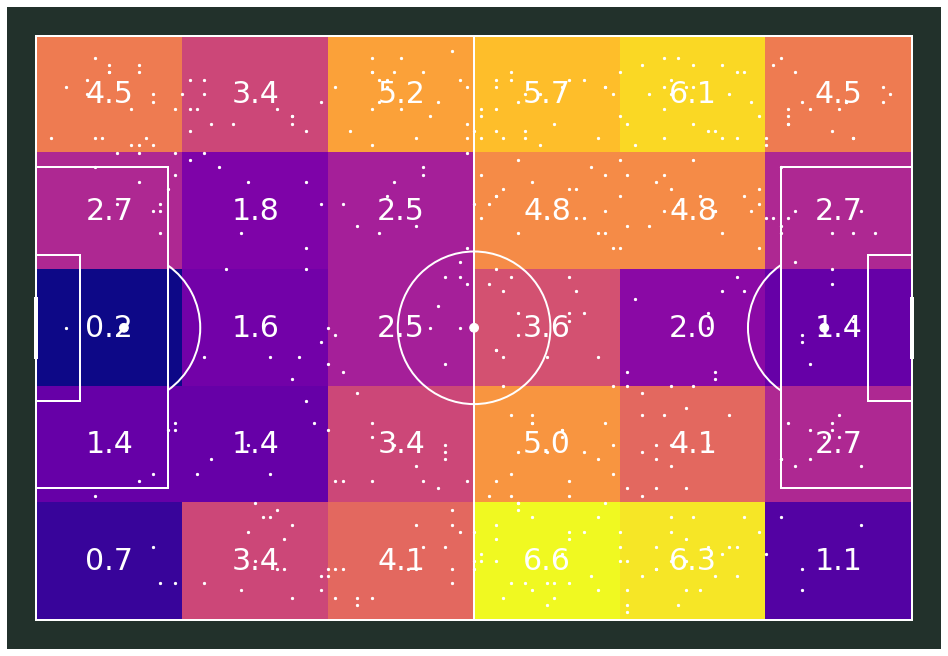

In [5]:
pitch = Pitch(pitch_type = 'statsbomb', figsize = (16, 9), line_zorder=2, pitch_color= '#22312b')
(statistic, x_grid, y_grid, cx, cy) = pitch.binned_statistic_2d(df.x, df.y,
                                                                statistic='count', bins = (6,5))
# work out proportions
all_pressure_count = statistic.sum()
statistic = (statistic/all_pressure_count * 100).round(1)
# draw
fig, ax = pitch.draw()
pitch.heatmap(x_grid, y_grid, statistic, ax=ax, zorder=2, cmap='plasma')
pitch.label_heatmap(statistic, cx, cy, color='white', fontsize=30, ax=ax, ha = 'center', va = 'center')
pitch.scatter(df.x, df.y, c='white', s=5, ax=ax)